In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('api_data_aadhar_enrolment_0_500000.csv')
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [5]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of               date           state          district  pincode  age_0_5  \
0       02-03-2025       Meghalaya  East Khasi Hills   793121       11   
1       09-03-2025       Karnataka   Bengaluru Urban   560043       14   
2       09-03-2025   Uttar Pradesh      Kanpur Nagar   208001       29   
3       09-03-2025   Uttar Pradesh           Aligarh   202133       62   
4       09-03-2025       Karnataka   Bengaluru Urban   560016       14   
...            ...             ...               ...      ...      ...   
499995  26-10-2025  Andhra Pradesh       Mahbubnagar   509207        1   
499996  26-10-2025  Andhra Pradesh             Medak   502220        1   
499997  26-10-2025  Andhra Pradesh             Medak   502256        0   
499998  26-10-2025  Andhra Pradesh             Medak   502286        1   
499999  26-10-2025  Andhra Pradesh           N. T. R   521402        1   

        age_5_17  age_18_greater  
0             61              37  
1        

In [7]:
df.dtypes

date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

In [8]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [10]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


In [11]:
df_copy = df.copy()

In [12]:
df_copy['total_enrol'] = df_copy['age_0_5'] + df_copy['age_5_17'] + df_copy['age_18_greater']
df_copy.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrol
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [13]:
#percentage of total enrolment by age group
df_copy['perc_age_0_5'] = df_copy['age_0_5'] / df_copy['total_enrol'] * 100
df_copy['perc_age_5_17'] = df_copy['age_5_17']/df_copy['total_enrol']*100
df_copy['perc_age_18_greater'] = df_copy['age_18_greater']/df_copy['total_enrol']*100

In [14]:
df_copy.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrol,perc_age_0_5,perc_age_5_17,perc_age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,10.091743,55.963303,33.944954
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,16.279070,38.372093,45.348837
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,23.577236,66.666667,9.756098
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,58.490566,27.358491,14.150943
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,27.450980,31.372549,41.176471
5,2025-03-09,Bihar,Sitamarhi,843331,20,49,12,81,24.691358,60.493827,14.814815
6,2025-03-09,Bihar,Sitamarhi,843330,23,24,42,89,25.842697,26.966292,47.191011
7,2025-03-09,Uttar Pradesh,Bahraich,271865,26,60,14,100,26.000000,60.000000,14.000000
8,2025-03-09,Uttar Pradesh,Firozabad,283204,28,26,10,64,43.750000,40.625000,15.625000
9,2025-03-09,Bihar,Purbi Champaran,845418,30,48,10,88,34.090909,54.545455,11.363636


In [15]:
cols_to_sum = ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrol']
state_summary = (
    df_copy.groupby('state')[cols_to_sum]
    .sum(numeric_only=True)
    .sort_values(ascending=False, by='total_enrol')
)
state_summary.head(10)

,age_0_5,age_5_17,age_18_greater,total_enrol
state,,,,
Uttar Pradesh,327183,330177,13066,670426
Bihar,160819,220183,9899,390901
Madhya Pradesh,189919,81008,6154,277081
West Bengal,159270,58386,4604,222260
Maharashtra,156612,60117,5301,222030
Rajasthan,137145,66169,2385,205699
Gujarat,123380,57421,12512,193313
Assam,100088,49915,17160,167163
Karnataka,91744,21967,8051,121762


In [16]:
state_age_breakdown = (
    df_copy.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum(numeric_only=True)
)
state_age_breakdown.head(10)

,age_0_5,age_5_17,age_18_greater
state,,,
100000,0,1,12
Andaman & Nicobar Islands,53,4,0
Andaman and Nicobar Islands,172,19,0
Andhra Pradesh,51803,7746,835
Arunachal Pradesh,1253,1573,50
Assam,100088,49915,17160
Bihar,160819,220183,9899
Chandigarh,1074,125,11
Chhattisgarh,39781,9196,1500


In [17]:
district_low_0_5 = (
    df_copy.groupby(['state','district'])['age_0_5']
    .sum(numeric_only=True)
    .sort_values(ascending=True)
)
district_low_0_5.head(15)

state              district          
100000             100000                0
Arunachal Pradesh  Leparada              0
Tamil Nadu         Namakkal   *          0
Haryana            Jhajjar *             0
West Bengal        KOLKATA               0
Telangana          Medchal?malkajgiri    0
Jammu & Kashmir    Srinagar              0
Sikkim             Mangan                0
WEST BENGAL        HOOGHLY               0
Bihar              Aurangabad(BH)        0
Uttar Pradesh      Raebareli             0
Orissa             Sundergarh            0
Rajasthan          Deeg                  0
West Bengal        West Medinipur        0
Tamil Nadu         Tuticorin             1
Name: age_0_5, dtype: int64

In [18]:
district_low_5_17 = (
    df_copy.groupby(['state','district'])['age_5_17']
    .sum(numeric_only=True)
    .sort_values(ascending=False)
)
district_low_5_17.head(20)

state          district          
Uttar Pradesh  Bahraich              18709
Bihar          Sitamarhi             15424
Meghalaya      East Khasi Hills      13718
Bihar          Gaya                  13626
               West Champaran        12277
               East Champaran        11691
               Patna                 11537
               Pashchim Champaran    10718
Uttar Pradesh  Sitapur               10602
Maharashtra    Thane                 10413
Uttar Pradesh  Varanasi              10276
Bihar          Muzaffarpur           10185
               Purbi Champaran       10071
               Saran                  9733
Uttar Pradesh  Agra                   9418
               Aligarh                9322
               Kheri                  9274
               Hardoi                 9147
               Shahjahanpur           9033
               Azamgarh               8895
Name: age_5_17, dtype: int64

In [19]:
date_enrol = (
    df_copy.groupby('date')['total_enrol']
    .sum(numeric_only=True)
)
date_enrol.head(20)

date
2025-03-02       109
2025-03-09      3404
2025-03-15      3102
2025-03-20      6218
2025-03-23       576
2025-03-26       211
2025-03-27      2704
2025-03-28       191
2025-03-29        67
2025-04-01    257438
2025-05-01    183616
2025-06-01    215734
2025-07-01    616868
2025-09-01     74989
2025-09-02     76496
2025-09-03     71988
2025-09-04     65349
2025-09-05     26069
2025-09-06     58957
2025-09-07     14658
Name: total_enrol, dtype: int64

In [20]:
df_copy['month'] = df['date'].dt.to_period('M')
monthly_trend = (
    df_copy.groupby('month')['total_enrol']
    .sum(numeric_only=True)
)
monthly_trend.head(25)

month
2025-03      16582
2025-04     257438
2025-05     183616
2025-06     215734
2025-07     616868
2025-09    1475879
2025-10     534909
Freq: M, Name: total_enrol, dtype: int64

In [21]:
pincode_summary = (
    df_copy.groupby(['state','district','pincode'])['total_enrol']
    .sum(numeric_only=True)
    .sort_values(ascending=False)
)
pincode_summary.head(20)

state           district             pincode
Uttar Pradesh   Moradabad            244001     12584
Meghalaya       West Khasi Hills     793119     10620
Uttar Pradesh   Aligarh              202001     10156
Delhi           West Delhi           110059      8841
Uttar Pradesh   Saharanpur           247001      8047
                Rampur               244901      7922
                Agra                 282001      7308
                Gautam Buddha Nagar  201301      7253
                Shahjahanpur         242001      7160
                Meerut               250002      7147
Madhya Pradesh  Barwani              451666      7113
Maharashtra     Aurangabad           431001      6826
Uttar Pradesh   Unnao                209801      6783
Haryana         Faridabad            121004      6623
Uttar Pradesh   Bahraich             271855      6585
Maharashtra     Thane                421302      6331
Bihar           Sitamarhi            843302      6268
                                     

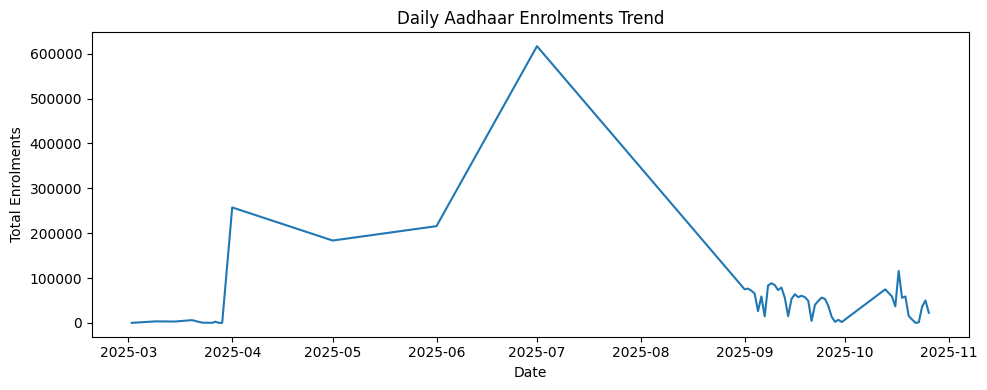

In [ ]:
#Daily enrolment trend plot
daily = df_copy.groupby('date')['total_enrol'].sum(numeric_only=True)
plt.figure(figsize=(10,4))
plt.plot(daily.index,daily.values)
plt.title("Daily Aadhaar Enrolments Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


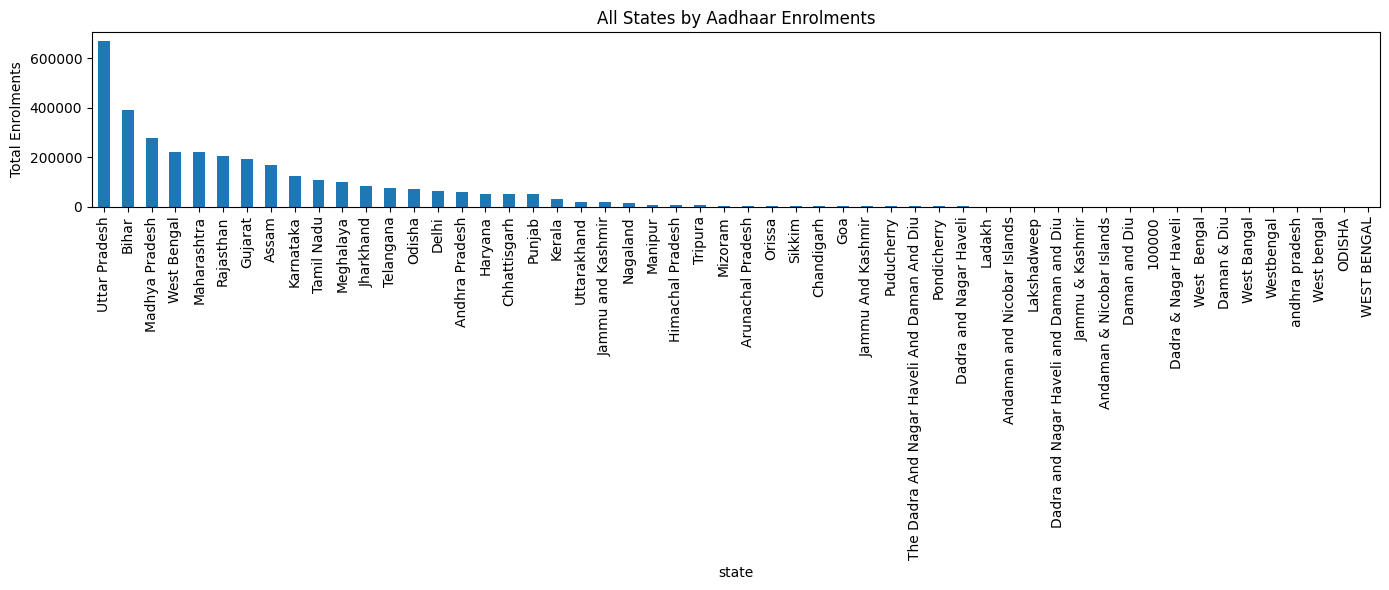

In [35]:
state_totals = (
    df_copy.groupby('state')['total_enrol']
    .sum()
    .sort_values(ascending=False)
    
)

plt.figure(figsize=(14,6))
state_totals.plot(kind='bar')
plt.title("All States by Aadhaar Enrolments")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


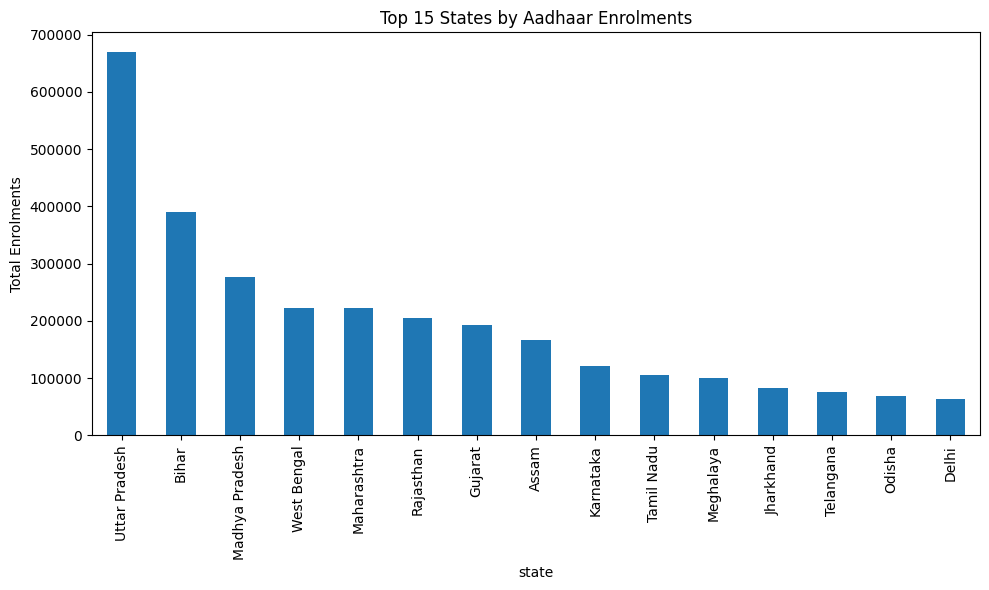

In [40]:
state_totals = (
    df_copy.groupby('state')['total_enrol']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
state_totals.plot(kind='bar')
plt.title("Top 15 States by Aadhaar Enrolments")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


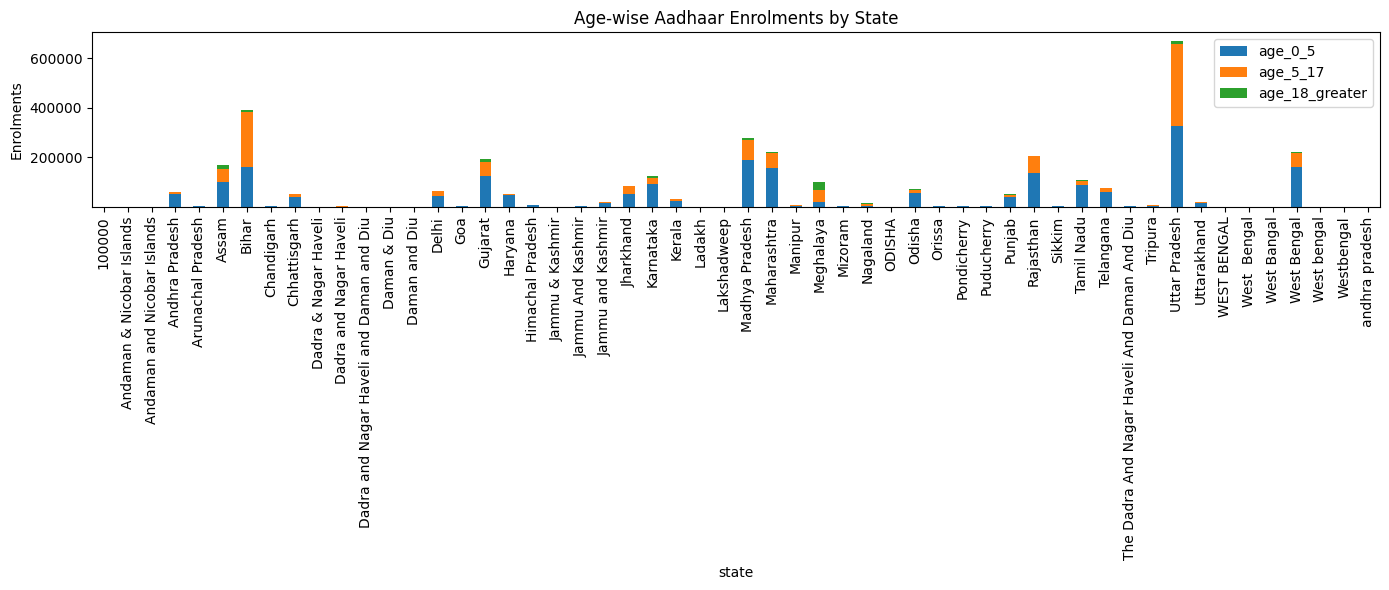

In [44]:
age_state = df_copy.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()

age_state.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6)
)
plt.title("Age-wise Aadhaar Enrolments by State")
plt.ylabel("Enrolments")
plt.tight_layout()
plt.show()


C:\Users\Tulsi\AppData\Local\Temp\ipykernel_12092\2621637176.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['age_5_17'].sum() / (x['age_0_5'].sum()+1))


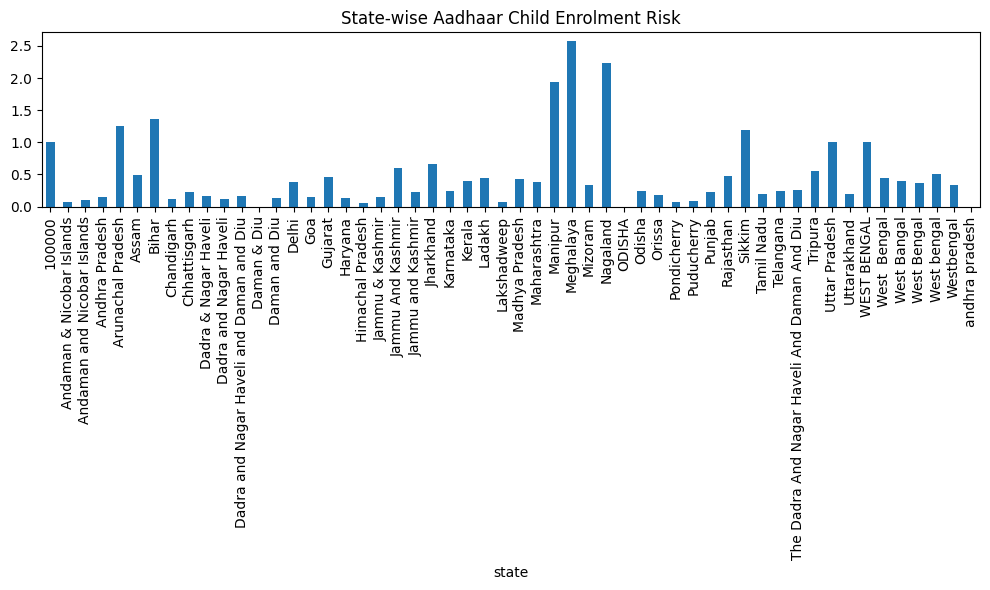

In [ ]:
    state_risk = (
        df.groupby('state')
        .apply(lambda x: x['age_5_17'].sum() / (x['age_0_5'].sum()+1))
    )

    plt.figure(figsize=(10,6))
    state_risk.plot(kind='bar')
    plt.title("State-wise Aadhaar Child Enrolment Risk")
    plt.tight_layout()
    plt.show()
